In [2]:
############################################################################
# Code produces plots from an experiment which measures the energy of alpha particles (in which repeat measurements were taken) 
# reads in energy spectra data, plots the average and total energy of alpha particles
# it also plots the speed of the average particle at different distances
############################################################################

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

alpha_energy = []
alpha_avg = []
alpha_num = []
z = 1
# repeats the process for all 4 set of data for a given distance
while z <= 4:
    # reads in file
    file_energy = open('C:\\Users\\Butter\\Desktop\\DIstance Measurements round 2\\3 cm\\Frames\\'+str(z)+'\\Energy.txt')
    Lines_energy = file_energy.read().splitlines()
    
    # adds spectra to array
    energy_spectra=[] 
    for line_energy in Lines_energy:
      tmpline_energy = line_energy.split('\t')
      energy_spectra.append([float(x) for x in np.array(tmpline_energy[:-1])])

    # use spectra to find total amount of energy
    total_energy = 0
    for i in range(len(energy_spectra[0])):
        if energy_spectra[1][i] != 0: # checks whether there is a particle present in the spectra
          for j in range(int(energy_spectra[1][i])): # that energy is added based on the number of times it was measured
            total_energy += energy_spectra[0][i]
    
    # get each individual energy
    alpha_energy.append(total_energy)

    # get total number of particles
    total_number = sum(energy_spectra[1])
    alpha_num.append(total_number)
    
    # calculate average energy
    if total_number != 0:
        avg_energy = int(round(total_energy / total_number))
    elif total_number == 0:
        avg_energy = 0
    
    alpha_avg.append(avg_energy)
    
    z += 1
    
print("Average energy =", alpha_avg)
print("Total energy =", alpha_energy)
print("Count number =", alpha_num)

Average energy = [879, 107, 338, 0]
Total energy = [7912.0, 107.0, 338.0, 0]
Count number = [9.0, 1.0, 1.0, 0.0]


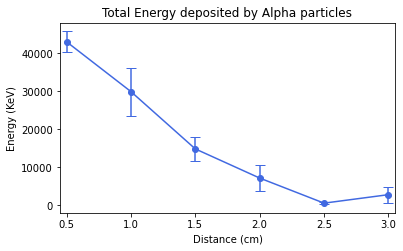

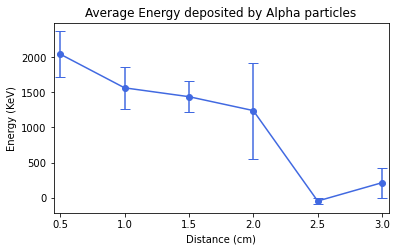

In [3]:
### Removing background values

# background arrays, with and without the zeros
bkg_avg_arr = [0, 188, 0, 0, 0, 265, 0, 0, 0, 0, 0, 0]
bkg_tot_arr = [0, 188.0, 0, 0, 0, 265.0, 0, 0, 0, 0, 0, 0]

bkg_avg_arr = [188, 265]
bkg_tot_arr = [188.0, 265.0]

# calcualting average and standard deviation for backgrouns values
bkg_avg_avg = np.mean(bkg_avg_arr)
bkg_avg_err = (np.std(bkg_avg_arr) / np.sqrt(len(bkg_avg_arr)))
bkg_tot_avg = ( np.mean(bkg_tot_arr) ) / 3
bkg_tot_err = ( (np.std(bkg_tot_arr) / np.sqrt(len(bkg_tot_arr))) ) / 3

# arrays for 0.5 cm
avg_arr_05 = [1917, 1698, 2204, 3253]
tot_arr_05 = [47922.0, 35661.0, 39665.0, 48796.0]

# arrays for 1 cm
avg_arr_10 = [1266, 2640, 1347, 1902]
tot_arr_10 = [21517.0, 50151.0, 17512.0, 30439.0]

# arrays for 1.5 cm
avg_arr_15 = [1121, 1470, 2135, 1926]
tot_arr_15 = [6726.0, 11760.0, 23482.0, 17336.0]

# arrays for 2 cm
avg_arr_20 = [130, 1366, 2901]
tot_arr_20 = [130.0, 6828.0, 14507.0]

# arrays for 2.5 cm
avg_arr_25 = [196, 207, 139]
tot_arr_25 = [1179.0, 207.0, 278.0]

# arrays for 3 cm
avg_arr_30 = [879, 107, 338]
tot_arr_30 = [7912.0, 107.0, 338.0]

# create list to run through arrays
avg_list = [avg_arr_05,avg_arr_10,avg_arr_15,avg_arr_20,avg_arr_25,avg_arr_30]
tot_list = [tot_arr_05,tot_arr_10,tot_arr_15,tot_arr_20,tot_arr_25,tot_arr_30]

# for the total energy values, calculate the average value at each distance and its error, and remove the background value
total = []
total_error = []
for i in tot_list:
    total.append(np.mean(i))
    total_error.append(np.std(i) / np.sqrt(len(i)))
total = [x-bkg_tot_avg for x in total]
total_error = [x+bkg_tot_err for x in total_error]

# now repeat for the average energy values
average = []
average_error = []
for i in avg_list:
    average.append(np.mean(i))
    average_error.append(np.std(i) / np.sqrt(len(i)))
average = [x-bkg_avg_avg for x in average]
average_error = [x+bkg_avg_err for x in average_error]

x_values = [0.5,1.0,1.5,2.0,2.5,3.0]

plt.figure(figsize=(6, 3.5))
plt.plot(x_values, total, color="royalblue")
plt.title("Total Energy deposited by Alpha particles")
plt.xlabel("Distance (cm)")
plt.ylabel("Energy (KeV)")
plt.xlim(0.45,3.05)
plt.errorbar(x_values, total, yerr = total_error, fmt="o", color="royalblue",capsize=5)
plt.savefig("Total energy deposited.jpg", dpi=200, bbox_inches='tight',pad_inches = 0)


plt.figure(figsize=(6, 3.5))
plt.plot(x_values,average, color="royalblue")
plt.title("Average Energy deposited by Alpha particles")
plt.xlabel("Distance (cm)")
plt.ylabel("Energy (KeV)")
plt.xlim(0.45,3.05)
#plt.ylim(0)
plt.errorbar(x_values, average, yerr = average_error, fmt="o", color="royalblue",capsize=5)
plt.savefig("Average energy deposited.jpg", dpi=200, bbox_inches='tight',pad_inches = 0)